In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("haberman.csv")

df.info()
df["age"].max()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


78

In [69]:
# (Q) how many data-points and features?
df.shape

(305, 4)

# Observation
   Haberman dataset contain 305 rows and 4 columns.
   Its unbalanced dataset.

In [70]:
#(Q) What are the column names in our dataset?
print (df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [71]:
#(Q) How many data points for each class are present? 
# 1 = the patient survived 5 years or longer
# 2 = the patient died within 5 year
df["status"].value_counts()

1    225
2     80
Name: status, dtype: int64

# Objective
   To find patients who can survive cancer surgery?  

# PDF

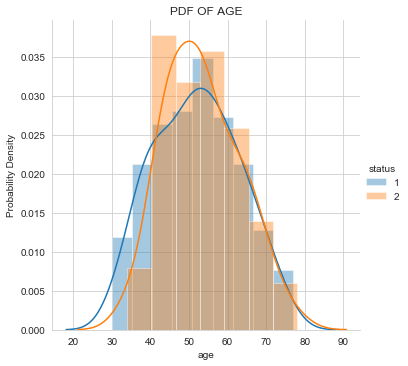

In [72]:
one = df[df["status"]==1]
two = df[df["status"]==2]
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "age").add_legend();
plt.title("PDF OF AGE")
plt.ylabel("Probability Density")
plt.show();

## Observation
####   1) Patient between age 30-40 have more chance to survive.
####   2) Patient between age 40-60 have less chance to survive.
####   4) Patient between age 40-76 have equal chance of surviving and not surviving.
 ####  5) Since there is lot of overlapping so we cant clearly observe survival chance with respect to age.
   

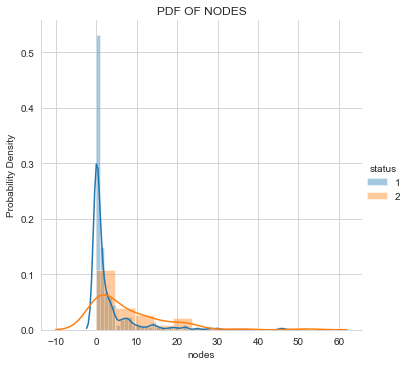

In [73]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "nodes").add_legend();
plt.title("PDF OF NODES")
plt.ylabel("Probability Density")
plt.show();

# Observations
#### 1) Patients having nodes 0-2 have higher chance to survive.
#### 2) Patients having nodes greater than 2 have less chance to survive.




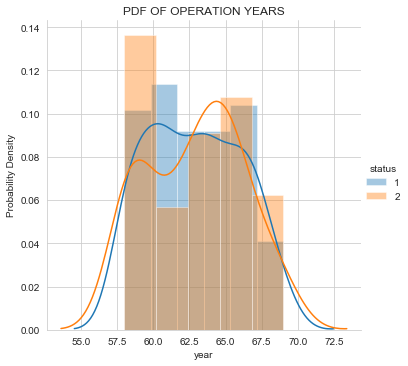

In [74]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "year").add_legend();
plt.title("PDF OF OPERATION YEARS")
plt.ylabel("Probability Density")
plt.show();

# Observations
#### 1) During 1958-1962.5 there were more successful operations.
#### 2) During 1962.5-1966 there were more unsuccessful operations.
#### 2) During 1966-1969 there were slightly more successful operation.

# CDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


Text(0.5, 1.0, "CDF OF PATIENT'S AGE WHO SURVIVED MORE THAN 5 YEARS AFTER OPERATION")

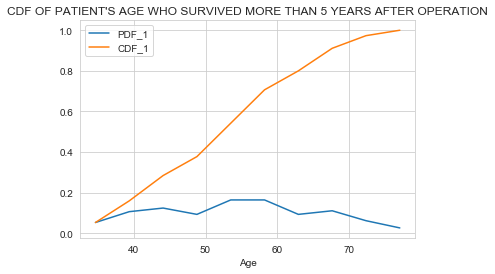

In [75]:
#for survivals
counts, bin_edges = np.histogram(one['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF_1")
plt.plot(bin_edges[1:], cdf,label="CDF_1")
plt.xlabel("Age")
plt.legend()
plt.title("CDF OF PATIENT'S AGE WHO SURVIVED MORE THAN 5 YEARS AFTER OPERATION")



Text(0.5, 1.0, "CDF OF PATIENT'S AGE WHO DID'NT SURVIVED AFTER OPERATION")

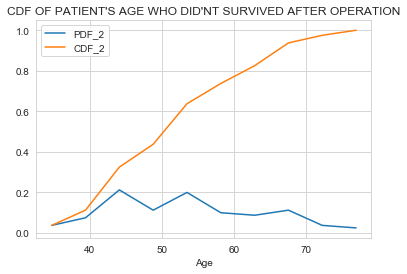

In [76]:
#non survivals
counts_n, bin_edges_n = np.histogram(two['age'], bins=10, density = True)
pdf_n = counts_n/(sum(counts_n))
#print(pdf);
#print(bin_edges)
cdf_n = np.cumsum(pdf_n)
plt.plot(bin_edges[1:],pdf_n,label="PDF_2")
plt.plot(bin_edges[1:], cdf_n,label="CDF_2")
plt.xlabel("Age")
plt.legend()
plt.title("CDF OF PATIENT'S AGE")
plt.title("CDF OF PATIENT'S AGE WHO DID'NT SURVIVED AFTER OPERATION")


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


Text(0.5, 1.0, "CDF OF PATIENT'S NODES")

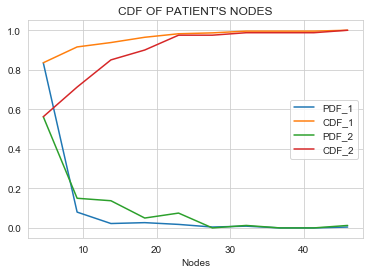

In [77]:
#for survivals
counts, bin_edges = np.histogram(one['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF_1")
plt.plot(bin_edges[1:], cdf,label="CDF_1")
plt.xlabel("Nodes")
plt.legend()
#non survivals
counts_n, bin_edges_n = np.histogram(two['nodes'], bins=10, density = True)
pdf_n = counts_n/(sum(counts_n))
#print(pdf);
#print(bin_edges)
cdf_n = np.cumsum(pdf_n)
plt.plot(bin_edges[1:],pdf_n,label="PDF_2")
plt.plot(bin_edges[1:], cdf_n,label="CDF_2")
plt.xlabel("Nodes")
plt.legend()
plt.title("CDF OF PATIENT'S NODES")


# Observation
#### 1) 84% patient survived who had less than 4 nodes.


# BOX PLOT

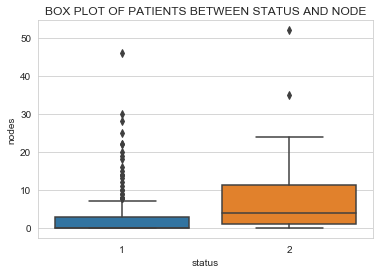

In [78]:

sns.boxplot(x='status',y='nodes', data=df)
plt.title("BOX PLOT OF PATIENTS BETWEEN STATUS AND NODE")
plt.show()

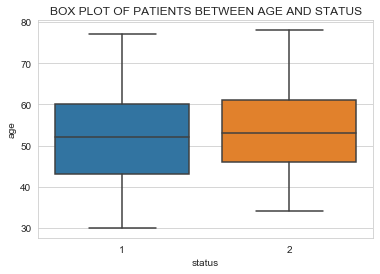

In [79]:

sns.boxplot(x='status',y='age', data=df)
plt.title("BOX PLOT OF PATIENTS BETWEEN AGE AND STATUS")
plt.show()

# Observation
#### 1) Patients between age 30-34 will survive operation.
#### 2) There are comparatively more patient between age 43-60 who had survived operation.

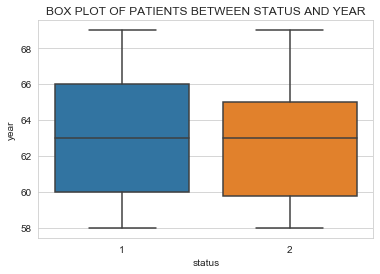

In [80]:

sns.boxplot(x='status',y='year', data=df)
plt.title("BOX PLOT OF PATIENTS BETWEEN STATUS AND YEAR")
plt.show()

# Observation
#### 1) There are comparatively more patient between year 1960-1666 who had survived operation.

# Violin Plot

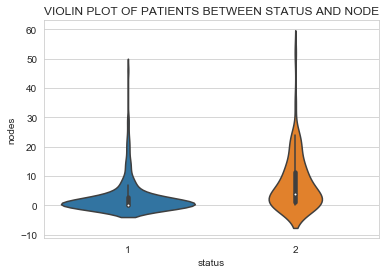

In [81]:
sns.violinplot(x="status", y="nodes", data=df, size=8)
plt.title("VIOLIN PLOT OF PATIENTS BETWEEN STATUS AND NODE")

plt.show()

# Observation
#### 1) Patients having nodes 0 will survive.
#### 2) Patients having nodes greater than 5 will not survive.
#### 3) Patients having nodes greater than 0 and less then 5 may or may not survive.


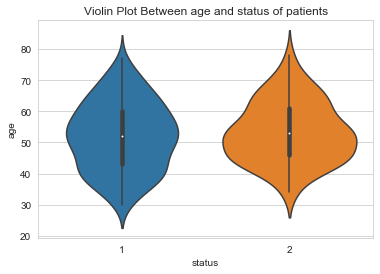

In [82]:
sns.violinplot(x="status", y="age", data=df, size=8)
plt.title("Violin Plot Between age and status of patients")
plt.show()

# Observation
#### 1) There are comparatively more patient between age 40-60 who had survived operation.

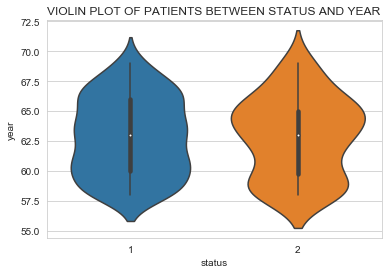

In [83]:
sns.violinplot(x="status", y="year", data=df, size=8)
plt.title("VIOLIN PLOT OF PATIENTS BETWEEN STATUS AND YEAR")
plt.show()

# Observation
#### 1) There are comparatively more patient between year 1960-1966 who had survived operation.

# Pairplot

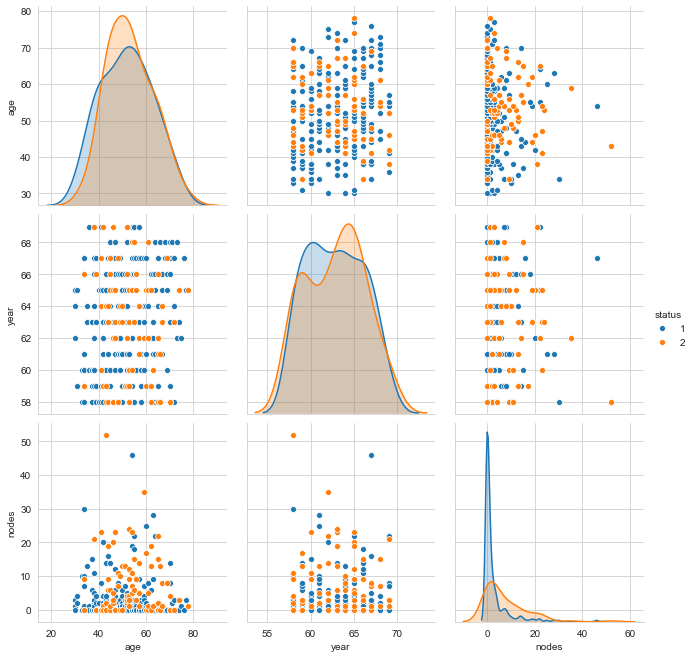

In [84]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", height=3);
plt.show()

# Observation
#### 1) All points are overlapped, hence we cant find much perfect conclusion from pairplot.
#### 2) Patients having age around 30 and having 0-4 nodes have chance to survive.
#### 3) Max. patients who operated in year 1958 didnt survived.
#### 4) Patients who operated around age of 30 during 1958-1965 survived.